In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [6]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
df =pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   

In [9]:
df['DiseaseProgression']=diabetes.target

In [10]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [11]:
df.skew()

age                  -0.231382
sex                   0.127385
bmi                   0.598148
bp                    0.290664
s1                    0.378108
s2                    0.436592
s3                    0.799255
s4                    0.735374
s5                    0.291774
s6                    0.207917
DiseaseProgression    0.440563
dtype: float64

In [12]:
df.isnull().sum()

age                   0
sex                   0
bmi                   0
bp                    0
s1                    0
s2                    0
s3                    0
s4                    0
s5                    0
s6                    0
DiseaseProgression    0
dtype: int64

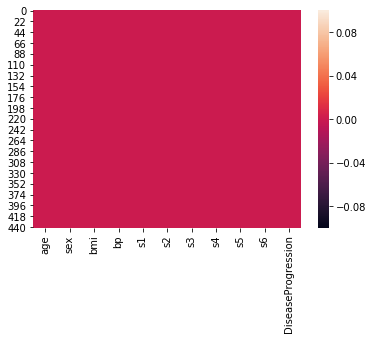

In [13]:
sns.heatmap(df.isnull())


In [14]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


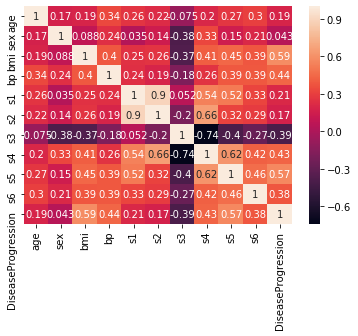

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df.shape

(442, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6CB2BA2B0>,
      dtype=object)

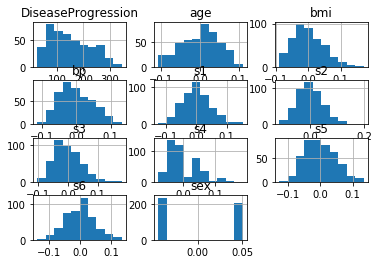

In [17]:
df.hist()

In [18]:
from scipy.stats import zscore
import numpy as np

In [19]:
z=np.abs(zscore(df))
z

array([[0.80050009, 1.06548848, 1.29708846, ..., 0.41855058, 0.37098854,
        0.01471948],
       [0.03956713, 0.93853666, 1.08218016, ..., 1.43655059, 1.93847913,
        1.00165882],
       [1.79330681, 1.06548848, 0.93453324, ..., 0.06020733, 0.54515416,
        0.14457991],
       ...,
       [0.87686984, 1.06548848, 0.33441002, ..., 0.98558469, 0.32567395,
        0.26145431],
       [0.9560041 , 0.93853666, 0.82123474, ..., 0.93615545, 0.54515416,
        0.88131756],
       [0.9560041 , 0.93853666, 1.53537419, ..., 0.08871747, 0.06442552,
        1.23540761]])

In [20]:
threshold=3
print(np.where(z>3))

(array([ 58, 123, 123, 123, 216, 230, 230, 256, 260, 261, 269, 322, 336,
       367, 441], dtype=int64), array([6, 4, 5, 7, 7, 4, 5, 2, 6, 6, 6, 7, 7, 2, 6], dtype=int64))


In [21]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


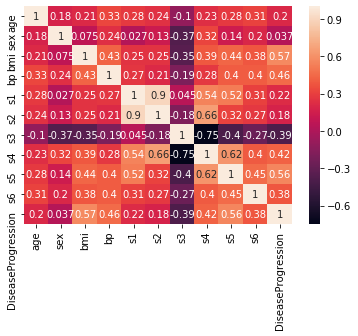

In [22]:
sns.heatmap(df_new.corr(),annot=True)

In [23]:
df_new.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# APPLYING HIGH CORRELATION FILTER

In [24]:
df_new.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
age,1.000000,0.178802,0.209488,0.328697,0.277281,0.243806,-0.101100,0.231392,0.283384,0.312350,0.203801
sex,0.178802,1.000000,0.074700,0.240279,0.026613,0.127081,-0.370851,0.320979,0.140355,0.197022,0.037038
bmi,0.209488,0.074700,1.000000,0.427860,0.250807,0.250363,-0.346641,0.392450,0.440334,0.380474,0.574210
bp,0.328697,0.240279,0.427860,1.000000,0.267662,0.213253,-0.191702,0.276523,0.400634,0.400282,0.457894
s1,0.277281,0.026613,0.250807,0.267662,1.000000,0.900119,0.045392,0.544248,0.522384,0.310482,0.221637
s2,0.243806,0.127081,0.250363,0.213253,0.900119,1.000000,-0.184463,0.656649,0.317752,0.270712,0.176021
s3,-0.101100,-0.370851,-0.346641,-0.191702,0.045392,-0.184463,1.000000,-0.746193,-0.400347,-0.266172,-0.387524
s4,0.231392,0.320979,0.392450,0.276523,0.544248,0.656649,-0.746193,1.000000,0.615141,0.395053,0.424691
s5,0.283384,0.140355,0.440334,0.400634,0.522384,0.317752,-0.400347,0.615141,1.000000,0.454388,0.558507
s6,0.312350,0.197022,0.380474,0.400282,0.310482,0.270712,-0.266172,0.395053,0.454388,1.000000,0.379788


In [25]:
#creating correlation matrix
corr_matrix=df_new.corr().abs()

In [26]:
# selecting upper triangle of corr matrix
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [27]:
upper

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
age,NaN,0.178802,0.209488,0.328697,0.277281,0.243806,0.101100,0.231392,0.283384,0.312350,0.203801
sex,NaN,NaN,0.074700,0.240279,0.026613,0.127081,0.370851,0.320979,0.140355,0.197022,0.037038
bmi,NaN,NaN,NaN,0.427860,0.250807,0.250363,0.346641,0.392450,0.440334,0.380474,0.574210
bp,NaN,NaN,NaN,NaN,0.267662,0.213253,0.191702,0.276523,0.400634,0.400282,0.457894
s1,NaN,NaN,NaN,NaN,NaN,0.900119,0.045392,0.544248,0.522384,0.310482,0.221637
s2,NaN,NaN,NaN,NaN,NaN,NaN,0.184463,0.656649,0.317752,0.270712,0.176021
s3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746193,0.400347,0.266172,0.387524
s4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615141,0.395053,0.424691
s5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454388,0.558507
s6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379788


In [28]:
#finding index of variable with corr greater than 0.6
to_drop=[column for column in upper.columns if any(upper[column]>0.6)]

In [29]:
to_drop

['s2', 's4', 's5']

In [30]:
#dropping highest corr variable and creating new dataset 
new_data=df_new.drop(df_new[to_drop], axis=1)

In [31]:
new_data.head()

,age,sex,bmi,bp,s1,s3,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.032356,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.046641,135.0


In [32]:
from sklearn.preprocessing import normalize
new_data=normalize(new_data)
new_data=pd.DataFrame(new_data)
new_data.head()

,0,1,2,3,4,5,6,7
0,0.000252,0.000336,0.000409,0.000145,-0.000293,-0.000287,-0.000117,1.000000
1,-0.000025,-0.000595,-0.000686,-0.000351,-0.000113,0.000992,-0.001229,0.999998
2,0.000605,0.000359,0.000315,-0.000040,-0.000323,-0.000229,-0.000184,1.000000
3,-0.000432,-0.000217,-0.000056,-0.000178,0.000059,-0.000175,-0.000045,1.000000
4,0.000040,-0.000331,-0.000270,0.000162,0.000029,0.000060,-0.000345,1.000000


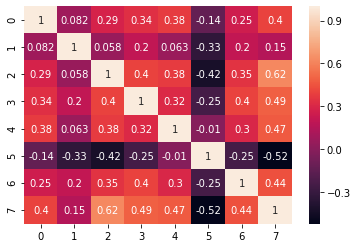

In [33]:
sns.heatmap(new_data.corr(),annot=True)

In [34]:
df_new.shape

(430, 11)

In [35]:
new_data.skew()

0   -0.861988
1    0.073248
2   -0.774919
3   -0.703659
4   -0.958201
5    1.554572
6   -0.995698
7    0.000000
dtype: float64

In [36]:
x=new_data.drop(7,axis=1)
x.head()

,0,1,2,3,4,5,6
0,0.000252,0.000336,0.000409,0.000145,-0.000293,-0.000287,-0.000117
1,-0.000025,-0.000595,-0.000686,-0.000351,-0.000113,0.000992,-0.001229
2,0.000605,0.000359,0.000315,-0.000040,-0.000323,-0.000229,-0.000184
3,-0.000432,-0.000217,-0.000056,-0.000178,0.000059,-0.000175,-0.000045
4,0.000040,-0.000331,-0.000270,0.000162,0.000029,0.000060,-0.000345


In [37]:
y=new_data[7]
y.head()

0    1.000000
1    0.999998
2    1.000000
3    1.000000
4    1.000000
Name: 7, dtype: float64

In [38]:
print(x.shape)
print(y.shape)

(430, 7)
(430,)


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=20)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 7)
(91, 7)
(339,)
(91,)


In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lm=linear_model.LinearRegression()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 8 is 0.7408091296789177


In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.5135710567756954

In [53]:
#max r2 score we get at random state=20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=8)
lm=LinearRegression()
lm.fit(x_train,y_train)
predlm=lm.predict(x_test)
lm.score(x_train,y_train)

0.573047196292845

In [54]:
lm.coef_

array([ 0.000149  , -0.00011511,  0.00058962,  0.00033075,  0.00063849,
       -0.00077063,  0.00026809])

In [55]:
lm.intercept_

0.9999994532461682

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is:", r2_score(y_test,predlm))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,predlm)))

r2 score is: 0.7408091296789177
RMSE is: 6.406447301202716e-07


In [57]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,predlm))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,predlm))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,predlm)))

Mean Absolute Error: 4.3225394190608546e-07
Mean Squared Error: 4.104256702308756e-13
Root Mean Squared Error: 6.406447301202716e-07


In [59]:
#save the model
from sklearn.externals import joblib
joblib.dump(lm,"Diabetes disease.pkl")

['Diabetes disease.pkl']